Adopción de vehículos eléctricos en EE. UU.

- Fuente: Kaggle
- Tamaño: Aproximadamente 408 registros.
- Variables: Datos anuales sobre registros de vehículos eléctricos, indicadores socioeconómicos, disponibilidad de infraestructura, incentivos políticos y precios de la energía de varios años.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos
df = pd.read_csv("/content/EV_Data.csv")
# Mostrar el número de registros
print(f"Número de registros en el dataset: {df.shape[0]}")

Número de registros en el dataset: 408


#1- Análisis Exploratorio de Datos (EDA) Inicial:

In [3]:
# Imprime los tipos de datos del df
print("Tipos de datos del DataFrame:")
display(df.dtypes)

Tipos de datos del DataFrame:


,0
Unnamed: 0.1,int64
Unnamed: 0,int64
state,object
year,int64
EV Registrations,int64
Total Vehicles,int64
EV Share (%),float64
Stations,int64
Total Charging Outlets,int64
Level 1,int64


In [4]:
# Imprime las primeras columnas del df
print("Primeras 5 filas del DataFrame:")
display(df.head())

Primeras 5 filas del DataFrame:


,Unnamed: 0.1,Unnamed: 0,state,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,Level 1,...,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share,Party
0,0,0,Alabama,2023,13000,4835900,0.27,424,1096,35,...,39.06,62.16,69.01,54.95,11.47,2.742,5446619.0,3.397137e+06,62.37,Republican
1,1,1,Alaska,2023,2700,559800,0.48,65,124,3,...,43.28,65.38,71.61,62.49,21.41,3.594,680974.0,5.175250e+05,76.00,Republican
2,2,2,Arizona,2023,89800,6529000,1.38,1198,3506,9,...,46.92,64.73,73.19,64.32,12.19,3.278,6447062.0,3.868118e+06,60.00,Democratic
3,3,3,Arkansas,2023,7100,2708300,0.26,334,833,3,...,39.08,63.39,68.58,56.21,9.73,2.760,3338322.0,2.291924e+06,68.65,Republican
4,4,4,California,2023,1256600,36850300,3.41,16381,49433,648,...,53.19,72.08,76.30,71.24,24.87,4.731,31057329.0,1.675788e+07,53.96,Democratic


In [6]:
# Imprime valores outliers
# df.shape[0] número de filas y df.shape[1] número de columnas
print(f"El conjunto de datos tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")
print("Resumen estadístico de las características numéricas:")
# df.describe() para calcular estadísticas descriptivas com la media, desviación estándar, valores mínimo y máximo, y percentiles para cada columna numérica.
display(df.describe())

El conjunto de datos tiene 408 filas y 36 columnas.

Resumen estadístico de las características numéricas:


,Unnamed: 0.1,Unnamed: 0,year,EV Registrations,Total Vehicles,EV Share (%),Stations,Total Charging Outlets,Level 1,Level 2,...,localofficials,personal,reducetax,regulate,worried,price_cents_per_kwh,gasoline_price_per_gallon,Total,Trucks,Trucks_Share
count,408.000000,408.000000,408.000000,4.080000e+02,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,408.000000,306.000000,3.000000e+02,3.000000e+02,300.000000
mean,203.500000,203.500000,2019.500000,2.569877e+04,5.415521e+06,0.328922,704.083333,1966.549020,59.414216,1572.394608,...,54.851013,42.336307,64.816667,73.054771,61.607647,11.723113,2.801546,5.572835e+06,3.297655e+06,61.204767
std,117.923704,117.923704,2.294101,9.035732e+04,5.981994e+06,0.448039,1508.141772,4746.001084,110.994156,3833.443990,...,4.845500,5.379607,5.200308,4.028651,6.088137,4.415207,0.434907,5.692398e+06,3.173077e+06,5.287931
min,0.000000,0.000000,2016.000000,0.000000e+00,3.121000e+05,0.000000,3.000000,5.000000,0.000000,5.000000,...,40.090000,28.250000,50.410000,62.190000,44.140000,7.460000,2.162000,4.452400e+05,2.625906e+05,48.460000
25%,101.750000,101.750000,2017.750000,1.400000e+03,1.522100e+06,0.060000,126.000000,314.750000,7.000000,220.750000,...,51.750000,38.920000,61.890000,70.162500,57.595000,9.080000,2.502000,1.915624e+06,1.208372e+06,57.715000
50%,203.500000,203.500000,2019.500000,5.300000e+03,3.970400e+06,0.165000,327.500000,838.000000,24.000000,659.500000,...,54.655000,42.200000,64.615000,73.070000,61.975000,10.060000,2.702000,4.221260e+06,2.557455e+06,60.880000
75%,305.250000,305.250000,2021.250000,1.800000e+04,6.570250e+06,0.410000,733.500000,1897.000000,66.250000,1555.250000,...,57.937500,45.955000,67.827500,75.937500,65.485000,12.330000,2.970000,6.513477e+06,3.932166e+06,64.337500
max,407.000000,407.000000,2023.000000,1.256600e+06,3.685030e+07,3.410000,16381.000000,49433.000000,1029.000000,38217.000000,...,70.290000,58.870000,76.550000,82.280000,76.050000,39.720000,4.731000,3.134907e+07,1.675788e+07,76.940000


Análisis Estadístico Descriptivo

In [19]:
# Imprime la distribución de las variables categóricas
print("Distribucion de variables:")
display(df.describe(include=["object", "category"]))

Distribucion de variables:


,state
count,408
unique,51
top,Alabama
freq,8


<ipython-input-8-9e43200a078e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


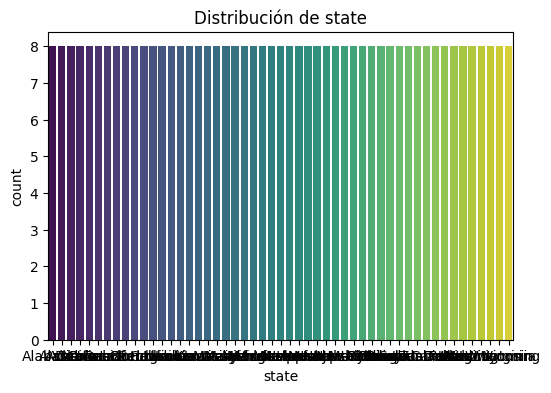

<ipython-input-8-9e43200a078e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="viridis")


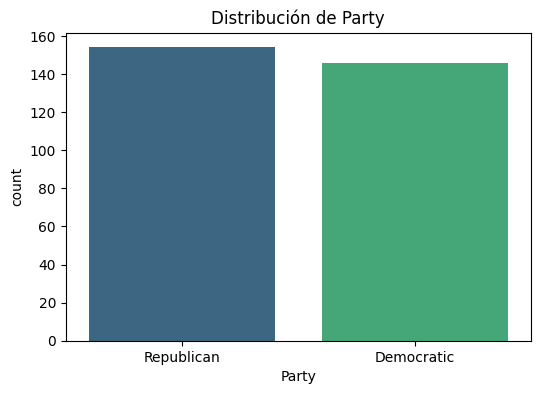

In [8]:
# Conteo de valores categóricos
categorical_cols = ["state","Party"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], palette="viridis")
    plt.title(f"Distribución de {col}")
    plt.show()

Visualizaciones

<Figure size 1000x600 with 0 Axes>

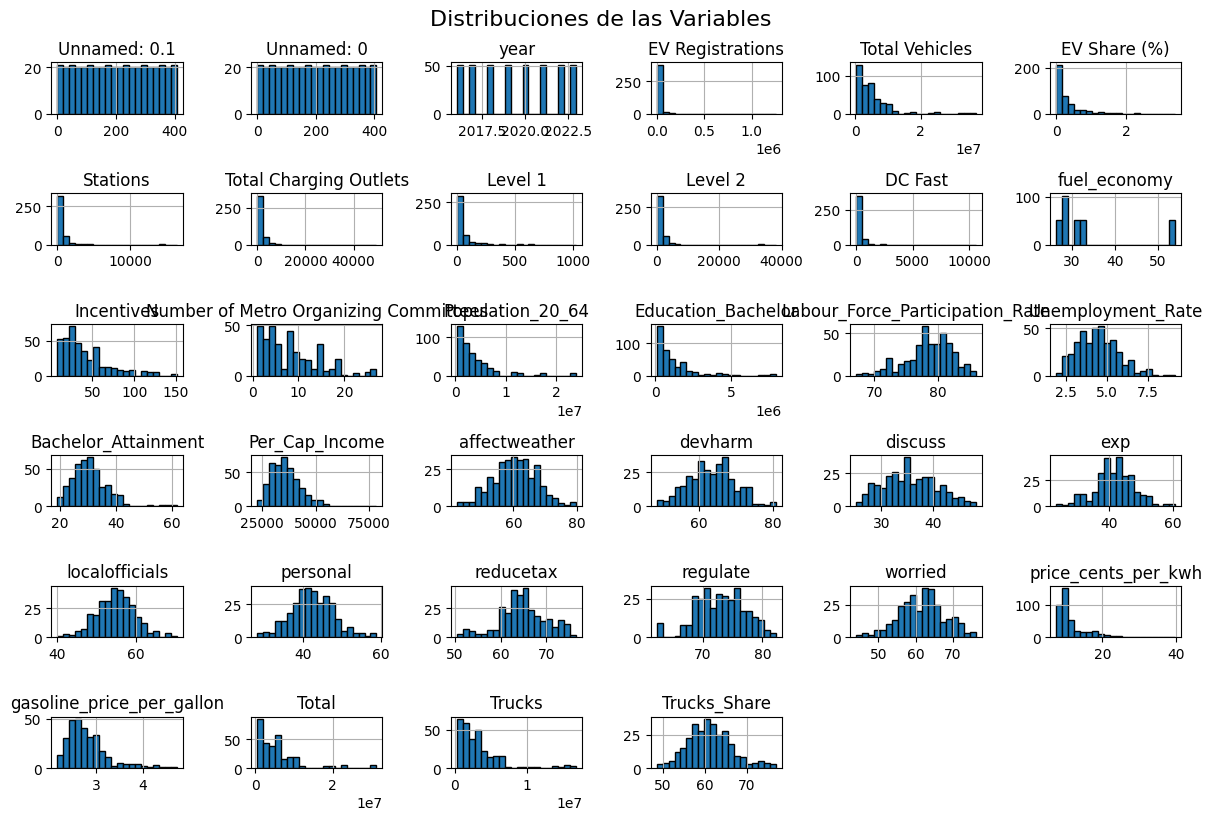

In [9]:
# Visualizar las distribuciones de las características numéricas principales del conjunto de datos.
plt.figure(figsize=(10, 6))

# Generar histogramas para cada columna numérica del DataFrame:
df.hist(bins=20, figsize=(12, 8), edgecolor='black')
# Ajustar automáticamente los espacios entre subgráficos para evitar solapamientos.
plt.tight_layout()
# Agregar un título general a los histogramas.
plt.suptitle("Distribuciones de las Variables", fontsize=16, y=1.02)
plt.show()

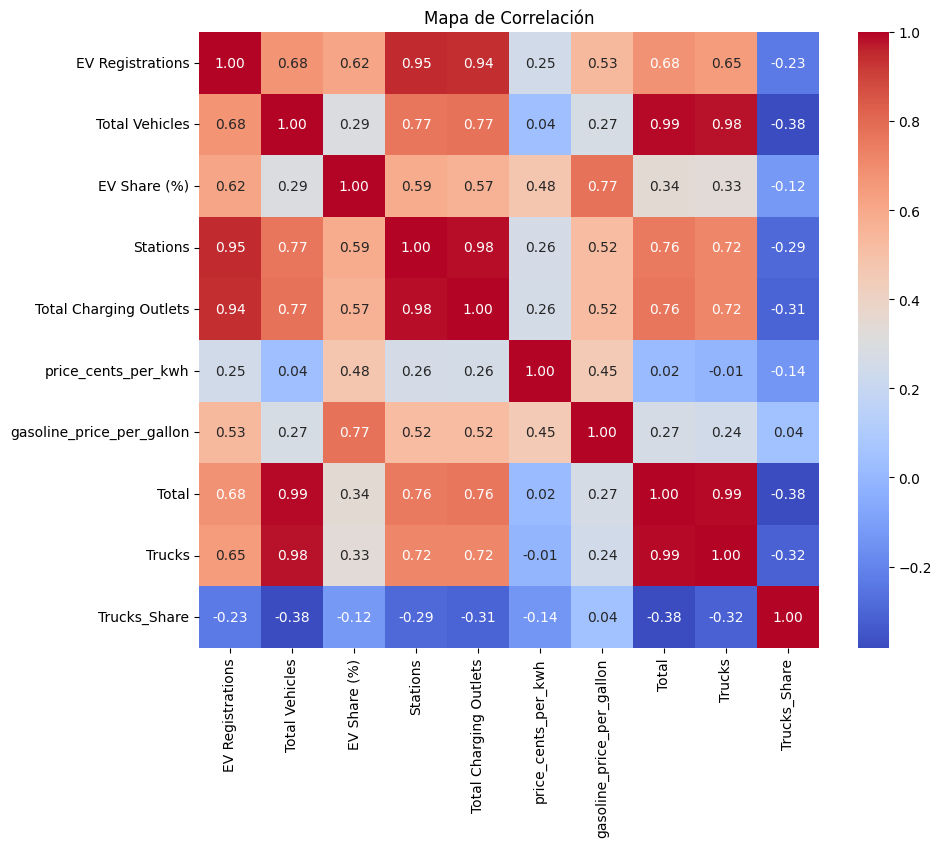

In [12]:
# Seleccionar solo columnas numéricas relevantes
numeric_cols = ["EV Registrations", "Total Vehicles", "EV Share (%)", "Stations",
                "Total Charging Outlets", "price_cents_per_kwh", "gasoline_price_per_gallon",
                "Total", "Trucks", "Trucks_Share"]

# Calcular la matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Visualizar el mapa de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlación")
plt.show()

Identificación de Valores Nulos y Outliers

Unnamed: 0.1                               0
Unnamed: 0                                 0
state                                      0
year                                       0
EV Registrations                           0
Total Vehicles                             0
EV Share (%)                               0
Stations                                   0
Total Charging Outlets                     0
Level 1                                    0
Level 2                                    0
DC Fast                                    0
fuel_economy                             102
Incentives                                 8
Number of Metro Organizing Committees     51
Population_20_64                           0
Education_Bachelor                         0
Labour_Force_Participation_Rate            0
Unemployment_Rate                          0
Bachelor_Attainment                        0
Per_Cap_Income                             0
affectweather                            102
devharm   

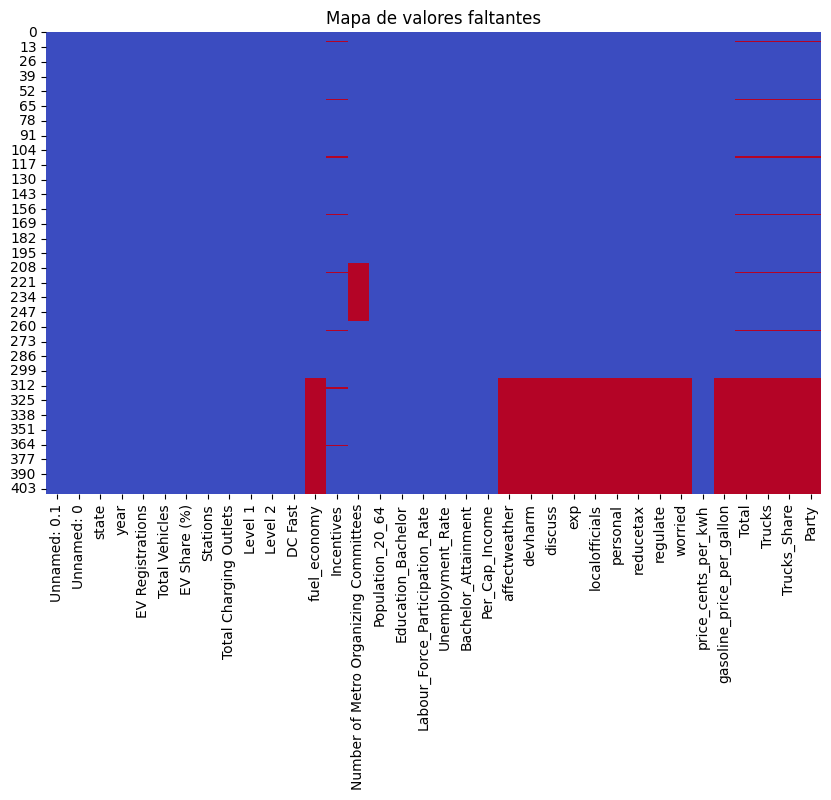

In [13]:
# Conteo de valores nulos en cada columna
print(df.isnull().sum())
# Visualización con un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap="coolwarm", cbar=False)
plt.title("Mapa de valores faltantes")
plt.show()

In [14]:
# Seleccionar solo las columnas numéricas para el cálculo de cuantiles
numeric_df = df.select_dtypes(include=np.number)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
# Identificar outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("Número de outliers por variable:")
print(outliers)

Número de outliers por variable:
Unnamed: 0.1                              0
Unnamed: 0                                0
year                                      0
EV Registrations                         49
Total Vehicles                           24
EV Share (%)                             35
Stations                                 31
Total Charging Outlets                   34
Level 1                                  39
Level 2                                  30
DC Fast                                  38
fuel_economy                             51
Incentives                               19
Number of Metro Organizing Committees    11
Population_20_64                         32
Education_Bachelor                       27
Labour_Force_Participation_Rate           7
Unemployment_Rate                         3
Bachelor_Attainment                       9
Per_Cap_Income                            8
affectweather                             1
devharm                                   1

Considerando el gran numero de datos nulos, se reemplazara por la media, ya que, a diferencia de eliminar filas o columnas completas, usar la media garantiza que la estructura del dataset permanezca intacta, permitiendo que se utilice en modelos sin afectar su rendimiento, y para la columna categorica se convertira en variables binarias, esto generará una columna binaria indicando si el estado es Republicano (1) o Democrático (0).

In [18]:
# Aplicar imputación con la media en todas las columnas numéricas
df.fillna(df.mean(numeric_only=True), inplace=True)
df = pd.get_dummies(df, columns=["Party"], drop_first=True)
# Verificar que ya no haya valores nulos
print(df.isnull().sum())

Unnamed: 0.1                             0
Unnamed: 0                               0
state                                    0
year                                     0
EV Registrations                         0
Total Vehicles                           0
EV Share (%)                             0
Stations                                 0
Total Charging Outlets                   0
Level 1                                  0
Level 2                                  0
DC Fast                                  0
fuel_economy                             0
Incentives                               0
Number of Metro Organizing Committees    0
Population_20_64                         0
Education_Bachelor                       0
Labour_Force_Participation_Rate          0
Unemployment_Rate                        0
Bachelor_Attainment                      0
Per_Cap_Income                           0
affectweather                            0
devharm                                  0
discuss    

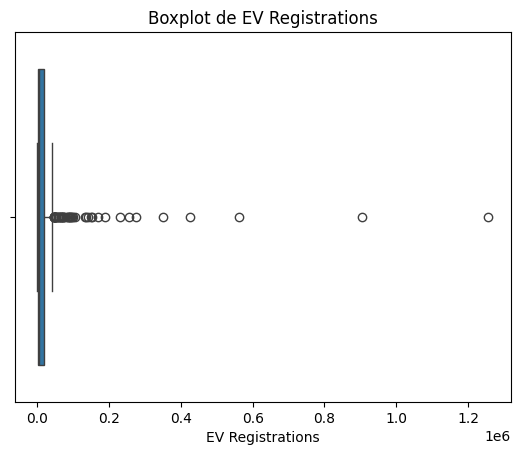

In [20]:
# Verificacion del impacto de los valores outliers a traves de un boxplot
sns.boxplot(x=df["EV Registrations"])
plt.title("Boxplot de EV Registrations")
plt.show()

Eliminación de outliers extremos: Aplicando el método del IQR

In [21]:
Q1 = df["EV Registrations"].quantile(0.25)
Q3 = df["EV Registrations"].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df["EV Registrations"] >= Q1 - 1.5 * IQR) & (df["EV Registrations"] <= Q3 + 1.5 * IQR)]

In [24]:
print(f"Tamaño antes de la eliminación: {df.shape[0]}")
print(f"Tamaño después de la eliminación: {df_filtered.shape[0]}")
# Comparar estadística descriptiva antes y después para verificar cambios en la media y los percentiles:
print("Antes:")
print(df["EV Registrations"].describe())

print("\nDespués:")
print(df_filtered["EV Registrations"].describe())

Tamaño antes de la eliminación: 408
Tamaño después de la eliminación: 359
Antes:
count    4.080000e+02
mean     2.569877e+04
std      9.035732e+04
min      0.000000e+00
25%      1.400000e+03
50%      5.300000e+03
75%      1.800000e+04
max      1.256600e+06
Name: EV Registrations, dtype: float64

Después:
count      359.00000
mean      8027.29805
std       9494.42831
min          0.00000
25%       1200.00000
50%       4200.00000
75%      11250.00000
max      40700.00000
Name: EV Registrations, dtype: float64


Nuevo boxplot para confirmar la distribución después de la limpieza

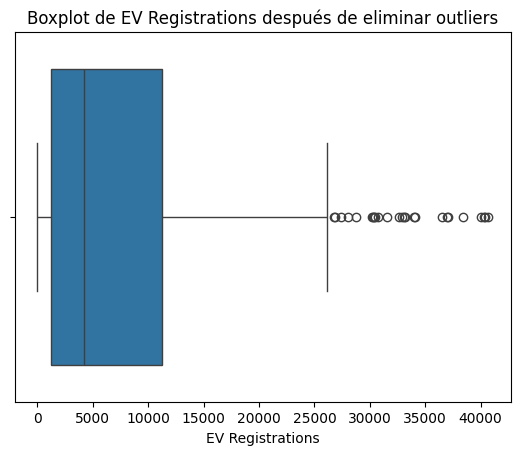

In [25]:
sns.boxplot(x=df_filtered["EV Registrations"])
plt.title("Boxplot de EV Registrations después de eliminar outliers")
plt.show()

#2- Resumen de Hallazgos:

#Características principales

- Existe una correlación extremadamente alta entre el número de estaciones de carga (Stations) y los registros de vehículos eléctricos (EV Registrations) (0.95).

- La cantidad de cargadores (Total Charging Outlets) también tiene un impacto significativo (0.94).Esto confirma que la disponibilidad de infraestructura de carga es un factor determinante en la adopción de EVs en EE.UU.

Impacto del precio del combustible:

- EV Share (%) presenta una correlación moderada con el precio de la gasolina (gasoline_price_per_gallon) (0.77).En estados con gasolina más cara, la adopción de EVs tiende a ser mayor.

#Desafíos en el análisis

Presencia de valores extremos:

- Se identificaron 49 outliers en EV Registrations, afectando la media y desviación estándar del dataset.La eliminación de estos valores redujo la variabilidad y mejoró la representación de datos reales.

Imputación de valores nulos:

- Variables como gasoline_price_per_gallon tenían valores nulos, que fueron tratados con imputación basada en la media.Esto ayudó a mantener la estructura del dataset sin introducir sesgos significativos.

#3- Diagnóstico y Selección de Problema:
A continuacion se abordara la problemática de Regresión para predecir la cantidad de registros de vehículos eléctricos por estado.

#Justificación de la problemática

Después del EDA inicial, el análisis reveló que existen fuertes correlaciones entre la cantidad de vehículos eléctricos registrados (EV Registrations) y factores como la infraestructura de carga, el precio de la gasolina y las políticas estatales. Esto sugiere que la adopción de EVs responde a múltiples variables, lo que lo convierte en un problema adecuado para regresión.

#Conclusión
La regresión es el enfoque más adecuado porque permite cuantificar el impacto de distintas variables en la adopción de vehículos eléctricos y producir predicciones útiles para la toma de decisiones. Sin embargo, es necesario abordar desafíos como los valores extremos, la redundancia entre variables y la influencia política para garantizar un modelo robusto.